# Fire Detection with Convolutional Neural Network (CNN)

This Jupyter notebook demonstrates the process of building and training a Convolutional Neural Network (CNN) for fire detection using a custom dataset. The dataset consists of images of fires and non-fires.

## Table of Contents
1. [Imports and Setup](#imports-and-setup)
2. [Data Loading and Preprocessing](#data-loading-and-preprocessing)
3. [Model Building and Training](#model-building-and-training)
4. [Model Evaluation and Visualization](#model-evaluation-and-visualization)
5. [Prediction on a Single Image](#prediction-on-a-single-image)

## Imports and Setup

We start by importing the necessary libraries and modules.

```python
import cv2
import glob
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
```

## Data Loading and Preprocessing

The dataset is loaded and preprocessed using OpenCV. The images are resized to 32x32 pixels and normalized. The labels are encoded and converted to one-hot encoding. The data is then split into training and testing sets.

```python
data = []
labels = []
i = 0
for item in glob.glob("fire_dataset/*/*"):
    i += 1
    img = cv2.imread(item)
    r_img = cv2.resize(img, (32, 32))
    r_img = r_img / 255.0
    label = item.split("/")[-2]
    data.append(r_img)
    labels.append(label)
    if i % 100 == 0:
        print("[INFO]: {} IMAGE'S HAS BEEN LOADED ".format(i))

le = LabelEncoder()
labels = le.fit_transform(labels)
labels = to_categorical(labels)
data = np.array(data)
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.3)
```

## Model Building and Training

A simple CNN model is created using TensorFlow's Sequential API. The model consists of two convolutional layers with ReLU activation functions and max pooling layers, followed by a flattening layer, two dense layers with ReLU activation functions, and an output layer with a softmax activation function.

```python
net = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPool2D((2, 2)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPool2D((2, 2)),
    layers.Flatten(),
    layers.Dense(50, activation="relu"),
    layers.Dense(2, activation="softmax")
])

net.compile(optimizer="ADAM", loss="binary_crossentropy", metrics=["accuracy"])
H = net.fit(X_train, y_train, epochs=35, batch_size=16, validation_data=(X_test, y_test))
```

## Model Evaluation and Visualization

The model is evaluated on the testing set, and the loss and accuracy are printed. The training and validation accuracy are then plotted using Matplotlib.

```python
loss, acc = net.evaluate(X_test, y_test)
print("loss: {:.2f}, acc: {:.2f}".format(loss, acc))

plt.plot(H.history["accuracy"], label="train")
plt.style.use("ggplot")
plt.plot(H.history["val_accuracy"], label="test")
plt.legend()
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.title("Fire/None Fire Dataset")
plt.show()
```

## Prediction on a Single Image

Finally, the trained model is used to predict the class of a single image. The image is loaded, preprocessed, and passed through the model. The predicted class and confidence are then displayed on the image using OpenCV.

```python
net = models.load_model("cnn.h5")
img = cv2.imread("fire_1.jpg")
r_img = cv2.resize(img, (32, 32))
r_img = r_img / 255.0
r_img = np.array([r_img])

output = net.predict(r_img)[0]
max_output = np.argmax(output)

category_name = ["fire", "non fire"]
text = "{}: {:.2f} %".format(category_name[max_output], output[max_output] * 100)
cv2.putText(img, text, (10, 45), cv2.FONT_HERSHEY_SIMPLEX, 1.0, (0, 255, 0), 3)
cv2.imshow("image", img)
cv2.waitKey(0)
cv2.destroyAllWindows()
```

In [4]:
import cv2
import glob
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical 
from tensorflow.keras import layers, models 
import matplotlib.pyplot as plt

data = []
labels = []
i = 0
for item in glob.glob("C:\\Users\\roozbehbadiee\\Desktop\\deeplearning roboteach\\sec 2\\fire_dataset/*/*"): 
    i += 1
    img = cv2.imread(item)
    r_img = cv2.resize(img, (32, 32))
    r_img = r_img
    label = item.split("\\")[-2]
    data.append(r_img)
    labels.append(label)
    if i % 100 == 0:
        print("[INFO]: {} IMAGE'S HAS BEEN LOADED ".format(i))

[INFO]: 100 IMAGE'S HAS BEEN LOADED 
[INFO]: 200 IMAGE'S HAS BEEN LOADED 
[INFO]: 300 IMAGE'S HAS BEEN LOADED 
[INFO]: 400 IMAGE'S HAS BEEN LOADED 
[INFO]: 500 IMAGE'S HAS BEEN LOADED 
[INFO]: 600 IMAGE'S HAS BEEN LOADED 
[INFO]: 700 IMAGE'S HAS BEEN LOADED 
[INFO]: 800 IMAGE'S HAS BEEN LOADED 
[INFO]: 900 IMAGE'S HAS BEEN LOADED 


In [4]:
le = LabelEncoder()
labels = le.fit_transform(labels)
labels = to_categorical(labels)
data = np.array(data)/255
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size= 0.3) 



In [5]:
net= models.Sequential([
  layers.Conv2D(32,(3,3),activation='relu', input_shape=(32,32,3)),
  layers.MaxPool2D((2,2)) ,
  layers.Conv2D(32,(3,3),activation='relu'),
  layers.MaxPool2D((2,2)) ,
  layers.Flatten(),
  layers.Dense(50,activation="relu"),
  layers.Dense(2,activation="softmax")
])
net.compile(optimizer= "ADAM",
loss= "binary_crossentropy", metrics = ["accuracy"])
H = net.fit(X_train, y_train, epochs = 35, batch_size= 16, validation_data=(X_test, y_test))
loss, acc = net.evaluate(X_test, y_test) 
print("loss: {:.2f}, acc: {:.2f}".format(loss, acc))


Epoch 1/35
44/44 [==============================] - 1s 13ms/step - loss: 0.4164 - accuracy: 0.8006 - val_loss: 0.2345 - val_accuracy: 0.9064
Epoch 2/35
44/44 [==============================] - 0s 10ms/step - loss: 0.1992 - accuracy: 0.9168 - val_loss: 0.1531 - val_accuracy: 0.9365
Epoch 3/35
44/44 [==============================] - 0s 9ms/step - loss: 0.2051 - accuracy: 0.9168 - val_loss: 0.1521 - val_accuracy: 0.9398
Epoch 4/35
44/44 [==============================] - 0s 10ms/step - loss: 0.1476 - accuracy: 0.9412 - val_loss: 0.1307 - val_accuracy: 0.9532
Epoch 5/35
44/44 [==============================] - 1s 14ms/step - loss: 0.1163 - accuracy: 0.9598 - val_loss: 0.0945 - val_accuracy: 0.9498
Epoch 6/35
44/44 [==============================] - 0s 11ms/step - loss: 0.1007 - accuracy: 0.9613 - val_loss: 0.1005 - val_accuracy: 0.9599
Epoch 7/35
44/44 [==============================] - 0s 11ms/step - loss: 0.1245 - accuracy: 0.9498 - val_loss: 0.0906 - val_accuracy: 0.9532
Epoch 8/35
44/

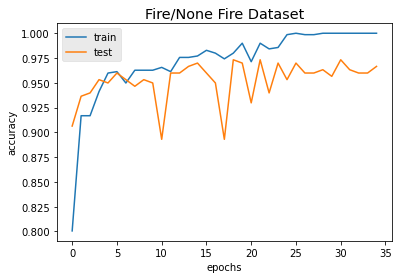

In [6]:
net.save("cnn.h5")
plt.plot(H.history["accuracy"], label = "train")
plt.style.use("ggplot")
plt.plot(H.history["val_accuracy"], label = "test")
plt.legend()
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.title("Fire/None Fire Dataset")
plt.show()



In [8]:
print(net.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1152)              0         
                                                                 
 dense (Dense)               (None, 50)                5

In [7]:
import os
os. environ ["TF_CPP_MIN_LOG_LEVEL"] = "3" 
from tensorflow.keras import models 
import cv2 
import numpy as np

net = models.load_model("cnn.h5")

img = cv2.imread("fire_1.jpg") 
r_img = cv2. resize(img, (32, 32)) 
r_img = r_img/255.0
r_img = np.array([r_img])

output = net.predict(r_img)[0]
max_output = np.argmax(output)

category_name = ["fire", "non fire"]
text = "{}: {:.2f} %".format(category_name[max_output], output[max_output]*100)
cv2.putText(img, text, (10, 45), cv2.FONT_HERSHEY_SIMPLEX, 1.0, (0, 255, 0), 3)
cv2.imshow("image", img)
cv2.waitKey(0)
cv2. destroyAllWindows ( )

